In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [3]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.gif')]

In [4]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    print ("Maximum difference was %d" % (max_diff))
    
    return ela_im

In [6]:
fakes_datasets_filename = get_imlist('datasets/train/fake/')
reals_datasets_filename = get_imlist('datasets/train/real/')

# Starts Here

In [7]:
fake_imfile_list = []
for filename in fakes_datasets_filename[0:750]:
    fake_imfile_list.append(array(convert_to_ela_image(filename, 90).resize((100, 100))).flatten())

Maximum difference was 9
Maximum difference was 42
Maximum difference was 30
Maximum difference was 12
Maximum difference was 22
Maximum difference was 30
Maximum difference was 51
Maximum difference was 57
Maximum difference was 27
Maximum difference was 36
Maximum difference was 16
Maximum difference was 25
Maximum difference was 131
Maximum difference was 43
Maximum difference was 41
Maximum difference was 45
Maximum difference was 21
Maximum difference was 71
Maximum difference was 30
Maximum difference was 26
Maximum difference was 33
Maximum difference was 16
Maximum difference was 9
Maximum difference was 44
Maximum difference was 87
Maximum difference was 21
Maximum difference was 30
Maximum difference was 24
Maximum difference was 2
Maximum difference was 30
Maximum difference was 30
Maximum difference was 19
Maximum difference was 7
Maximum difference was 59
Maximum difference was 48
Maximum difference was 10
Maximum difference was 36
Maximum difference was 24
Maximum differe

Maximum difference was 17
Maximum difference was 35
Maximum difference was 43
Maximum difference was 76
Maximum difference was 5
Maximum difference was 69
Maximum difference was 1
Maximum difference was 3
Maximum difference was 33
Maximum difference was 28
Maximum difference was 37
Maximum difference was 24
Maximum difference was 34
Maximum difference was 26
Maximum difference was 4
Maximum difference was 2
Maximum difference was 27
Maximum difference was 24
Maximum difference was 61
Maximum difference was 40
Maximum difference was 24
Maximum difference was 44
Maximum difference was 22
Maximum difference was 31
Maximum difference was 46
Maximum difference was 1
Maximum difference was 2
Maximum difference was 14
Maximum difference was 28
Maximum difference was 27
Maximum difference was 31
Maximum difference was 23
Maximum difference was 34
Maximum difference was 29
Maximum difference was 41
Maximum difference was 29
Maximum difference was 30
Maximum difference was 13
Maximum difference 

Maximum difference was 29
Maximum difference was 28
Maximum difference was 40
Maximum difference was 37
Maximum difference was 4
Maximum difference was 30
Maximum difference was 29
Maximum difference was 25
Maximum difference was 38
Maximum difference was 37
Maximum difference was 46
Maximum difference was 36
Maximum difference was 23
Maximum difference was 40
Maximum difference was 106
Maximum difference was 69
Maximum difference was 3
Maximum difference was 25
Maximum difference was 27
Maximum difference was 3
Maximum difference was 30
Maximum difference was 36
Maximum difference was 57
Maximum difference was 46
Maximum difference was 31
Maximum difference was 27
Maximum difference was 34
Maximum difference was 22
Maximum difference was 60
Maximum difference was 24
Maximum difference was 32
Maximum difference was 22
Maximum difference was 21
Maximum difference was 24
Maximum difference was 22
Maximum difference was 57
Maximum difference was 34
Maximum difference was 40
Maximum differ

In [8]:
real_imfile_list = []
for filename in reals_datasets_filename[0:750]:
    real_imfile_list.append(array(convert_to_ela_image(filename, 90).resize((100, 100))).flatten())

Maximum difference was 3
Maximum difference was 3
Maximum difference was 11
Maximum difference was 4
Maximum difference was 18
Maximum difference was 16
Maximum difference was 18
Maximum difference was 16
Maximum difference was 19
Maximum difference was 14
Maximum difference was 8
Maximum difference was 8
Maximum difference was 11
Maximum difference was 13
Maximum difference was 1
Maximum difference was 6
Maximum difference was 29
Maximum difference was 4
Maximum difference was 12
Maximum difference was 15
Maximum difference was 54
Maximum difference was 51
Maximum difference was 12
Maximum difference was 2
Maximum difference was 15
Maximum difference was 15
Maximum difference was 17
Maximum difference was 6
Maximum difference was 5
Maximum difference was 16
Maximum difference was 3
Maximum difference was 11
Maximum difference was 14
Maximum difference was 7
Maximum difference was 16
Maximum difference was 6
Maximum difference was 15
Maximum difference was 21
Maximum difference was 4
M

Maximum difference was 17
Maximum difference was 4
Maximum difference was 30
Maximum difference was 16
Maximum difference was 6
Maximum difference was 13
Maximum difference was 5
Maximum difference was 21
Maximum difference was 5
Maximum difference was 15
Maximum difference was 12
Maximum difference was 7
Maximum difference was 16
Maximum difference was 9
Maximum difference was 14
Maximum difference was 14
Maximum difference was 13
Maximum difference was 13
Maximum difference was 17
Maximum difference was 5
Maximum difference was 3
Maximum difference was 18
Maximum difference was 18
Maximum difference was 20
Maximum difference was 16
Maximum difference was 15
Maximum difference was 13
Maximum difference was 7
Maximum difference was 16
Maximum difference was 19
Maximum difference was 15
Maximum difference was 14
Maximum difference was 22
Maximum difference was 14
Maximum difference was 6
Maximum difference was 17
Maximum difference was 43
Maximum difference was 39
Maximum difference was

Maximum difference was 5
Maximum difference was 3
Maximum difference was 12
Maximum difference was 3
Maximum difference was 6
Maximum difference was 15
Maximum difference was 13
Maximum difference was 28
Maximum difference was 6
Maximum difference was 16
Maximum difference was 5
Maximum difference was 2
Maximum difference was 15
Maximum difference was 17
Maximum difference was 11
Maximum difference was 79
Maximum difference was 14
Maximum difference was 17
Maximum difference was 6
Maximum difference was 15
Maximum difference was 4
Maximum difference was 15
Maximum difference was 15
Maximum difference was 5
Maximum difference was 3
Maximum difference was 17
Maximum difference was 18
Maximum difference was 2
Maximum difference was 19
Maximum difference was 15
Maximum difference was 16
Maximum difference was 4
Maximum difference was 17
Maximum difference was 16
Maximum difference was 7
Maximum difference was 7
Maximum difference was 18
Maximum difference was 16
Maximum difference was 18
M

In [9]:
len(fake_imfile_list)

750

In [10]:
len(real_imfile_list)

750

# Lanjut

In [11]:
for index, fake_imfile in enumerate(fake_imfile_list):
    fake_imfile_list[index] = array(fake_imfile) / 255.0

In [12]:
for index, real_imfile in enumerate(real_imfile_list):
    real_imfile_list[index] = array(real_imfile) / 255.0

# Change to Data Frame

## Extend and Delete

In [13]:
X = []
X.extend(fake_imfile_list)
X.extend(real_imfile_list)

In [14]:
len(X)

1500

In [15]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,0.000000,0.000000,0.219608,0.109804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.023529,0.023529,0.047059,0.023529,0.023529,0.047059,0.000000,0.023529,0.047059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.047059,0.023529,0.000000,0.070588
2,0.031373,0.031373,0.066667,0.000000,0.000000,0.000000,0.031373,0.031373,0.031373,0.031373,...,0.000000,0.031373,0.031373,0.000000,0.031373,0.031373,0.000000,0.000000,0.000000,0.000000
3,0.164706,0.247059,0.082353,0.082353,0.164706,0.082353,0.000000,0.000000,0.000000,0.000000,...,0.082353,0.247059,0.082353,0.082353,0.082353,0.082353,0.000000,0.000000,0.000000,0.000000
4,0.133333,0.133333,0.133333,0.043137,0.043137,0.043137,0.000000,0.000000,0.000000,0.000000,...,0.090196,0.090196,0.000000,0.133333,0.000000,0.090196,0.043137,0.090196,0.090196,0.090196
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031373,0.066667,0.031373,0.031373,...,0.000000,0.066667,0.066667,0.066667,0.031373,0.031373,0.031373,0.000000,0.000000,0.000000
6,0.039216,0.019608,0.000000,0.019608,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050980,0.031373,0.137255,0.137255,...,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035294,0.035294,0.035294,0.035294,0.109804,0.109804,0.109804,0.035294,0.035294,0.035294
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054902,0.027451,0.054902,0.000000,...,0.027451,0.027451,0.027451,0.054902,0.027451,0.027451,0.054902,0.082353,0.054902,0.054902


## Add Y

In [16]:
Y = []
for i in range(len(fake_imfile_list)):
    Y.append(1)
for i in range(len(real_imfile_list)):
    Y.append(0)

In [17]:
Y = to_categorical(Y, num_classes=2)

In [18]:
Y.shape

(1500, 2)

# Reshape X

In [19]:
X = X.values.reshape(-1, 100, 100, 3)

In [20]:
X.shape

(1500, 100, 100, 3)

## Train Test Split

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [22]:
X_val

array([[[[0.        , 0.02352941, 0.05098039],
         [0.        , 0.        , 0.        ],
         [0.05098039, 0.        , 0.        ],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.05098039, 0.02352941],
         [0.        , 0.        , 0.05098039]],

        [[0.        , 0.02352941, 0.05098039],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.05098039, 0.05098039, 0.        ],
         [0.        , 0.        , 0.        ],
         [0.02352941, 0.02352941, 0.05098039]],

        [[0.        , 0.02352941, 0.05098039],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.07843137, 0.05098039, 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.05098039],
         [0.        , 0.        , 0.05098039]

# Model

In [38]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [39]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [40]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [41]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [42]:
epochs = 50
batch_size = 100

In [43]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 1350 samples, validate on 150 samples
Epoch 1/50
 - 3s - loss: 1.2542 - acc: 0.5630 - val_loss: 0.6064 - val_acc: 0.6133
Epoch 2/50
 - 3s - loss: 0.6437 - acc: 0.6415 - val_loss: 0.6952 - val_acc: 0.4933
Epoch 3/50
 - 3s - loss: 0.6262 - acc: 0.7459 - val_loss: 0.5479 - val_acc: 0.8267
Epoch 4/50
 - 3s - loss: 0.5987 - acc: 0.7252 - val_loss: 0.5469 - val_acc: 0.8267
Epoch 5/50
 - 3s - loss: 0.5387 - acc: 0.7837 - val_loss: 0.5361 - val_acc: 0.8533
Epoch 6/50
 - 3s - loss: 0.5510 - acc: 0.8274 - val_loss: 0.6142 - val_acc: 0.6667
Epoch 7/50
 - 3s - loss: 0.4781 - acc: 0.8726 - val_loss: 0.4704 - val_acc: 0.8267
Epoch 8/50
 - 3s - loss: 0.3288 - acc: 0.8800 - val_loss: 0.4573 - val_acc: 0.8867
Epoch 9/50
 - 3s - loss: 0.3649 - acc: 0.9037 - val_loss: 0.4496 - val_acc: 0.8667
Epoch 10/50
 - 3s - loss: 0.1484 - acc: 0.9607 - val_loss: 0.4888 - val_acc: 0.8533
Epoch 11/50
 - 3s - loss: 0.3674 - acc: 0.9119 - val_loss: 0.4935 - val_acc: 0.8867
Epoch 12/50
 - 3s - loss: 0.1000 - acc

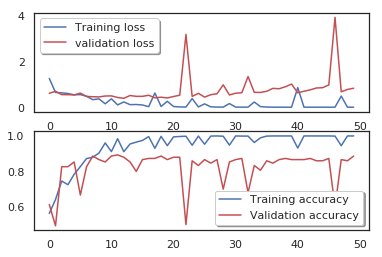

In [44]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

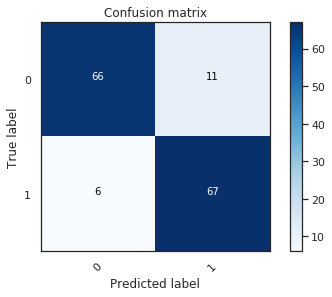

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))